In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.figure_factory as ff

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing

from IPython.display import display

from sklearn.svm import OneClassSVM
from numpy import where

import nbformat

from sklearn.preprocessing import LabelEncoder

In [2]:
#Now we can read the modified csv file into a pandas dataframe
data = pd.read_csv("../datasets/statlog+german+credit+data/german.data", sep =" ", header=None, names = ["Status checking", 
                                                                                                        "Duration in month", 
                                                                                                        "Credit history", 
                                                                                                        "Purpose", 
                                                                                                        "Credit amount", 
                                                                                                        "Savings account", 
                                                                                                        "Present employment", 
                                                                                                        "Installment rate %", 
                                                                                                        "Personal status/sex", 
                                                                                                        "Other debtors", 
                                                                                                        "Present residence", 
                                                                                                        "Property", 
                                                                                                        "Age in years", 
                                                                                                        "Other installment plans", 
                                                                                                        "Housing", 
                                                                                                        "# Existing credits", 
                                                                                                        "Job", 
                                                                                                        "# Dependents", 
                                                                                                        "Telephone", 
                                                                                                        "Foreign worker",
                                                                                                        "Class"
                                                                                                        ])
print(data.head())

  Status checking  Duration in month Credit history Purpose  Credit amount  \
0             A11                  6            A34     A43           1169   
1             A12                 48            A32     A43           5951   
2             A14                 12            A34     A46           2096   
3             A11                 42            A32     A42           7882   
4             A11                 24            A33     A40           4870   

  Savings account Present employment  Installment rate % Personal status/sex  \
0             A65                A75                   4                 A93   
1             A61                A73                   2                 A92   
2             A61                A74                   2                 A93   
3             A61                A74                   2                 A93   
4             A61                A73                   3                 A93   

  Other debtors  ...  Property Age in years  Other

In [3]:
# classifying certain attributes as categories in dataset
# 1,3,4,6,7,9,10,12,14,15,17,19,20
'''data[1] = data[1].astype('category')
data[3] = data[3].astype('category')
data[4] = data[4].astype('category')
data[6] = data[6].astype('category')
data[7] = data[7].astype('category')
data[9] = data[9].astype('category')
data[10] = data[10].astype('category')
data[12] = data[12].astype('category')
data[14] = data[14].astype('category')
data[15] = data[15].astype('category')
data[17] = data[17].astype('category')
data[19] = data[19].astype('category')
data[20] = data[20].astype('category')'''

label_encoder = LabelEncoder()
data["Status checking"] = label_encoder.fit_transform(data["Status checking"])
data["Credit history"] = label_encoder.fit_transform(data["Credit history"])
data["Savings account"] = label_encoder.fit_transform(data["Savings account"])
data["Present employment"] = label_encoder.fit_transform(data["Present employment"])
data["Other debtors"] = label_encoder.fit_transform(data["Other debtors"])
data["Property"] = label_encoder.fit_transform(data["Property"])
data["Other installment plans"] = label_encoder.fit_transform(data["Other installment plans"])
data["Housing"] = label_encoder.fit_transform(data["Housing"])
data["Job"] = label_encoder.fit_transform(data["Job"])
data["Telephone"] = label_encoder.fit_transform(data["Telephone"])
data["Foreign worker"] = label_encoder.fit_transform(data["Foreign worker"])
data["Foreign worker"] = 1- data["Foreign worker"]


data = pd.get_dummies(data, columns=["Personal status/sex"])



df = pd.DataFrame(data)

# Rename specific columns
column_mapping = {'Personal status/sex_A91': 'Male div', 'Personal status/sex_A92': 'Female div/mar', 
                  'Personal status/sex_A93': 'Male sing', 'Personal status/sex_A94': 'Male mar/wid', 
                  'Personal status/sex_A95': 'Female sing'}
df.rename(columns=column_mapping, inplace=True)

print(df.head())
df.to_csv("germanProcessed.csv")

   Status checking  Duration in month  Credit history Purpose  Credit amount  \
0                0                  6               4     A43           1169   
1                1                 48               2     A43           5951   
2                3                 12               4     A46           2096   
3                0                 42               2     A42           7882   
4                0                 24               3     A40           4870   

   Savings account  Present employment  Installment rate %  Other debtors  \
0                4                   4                   4              0   
1                0                   2                   2              0   
2                0                   3                   2              0   
3                0                   3                   2              2   
4                0                   2                   3              0   

   Present residence  ...  # Existing credits  Job  # De

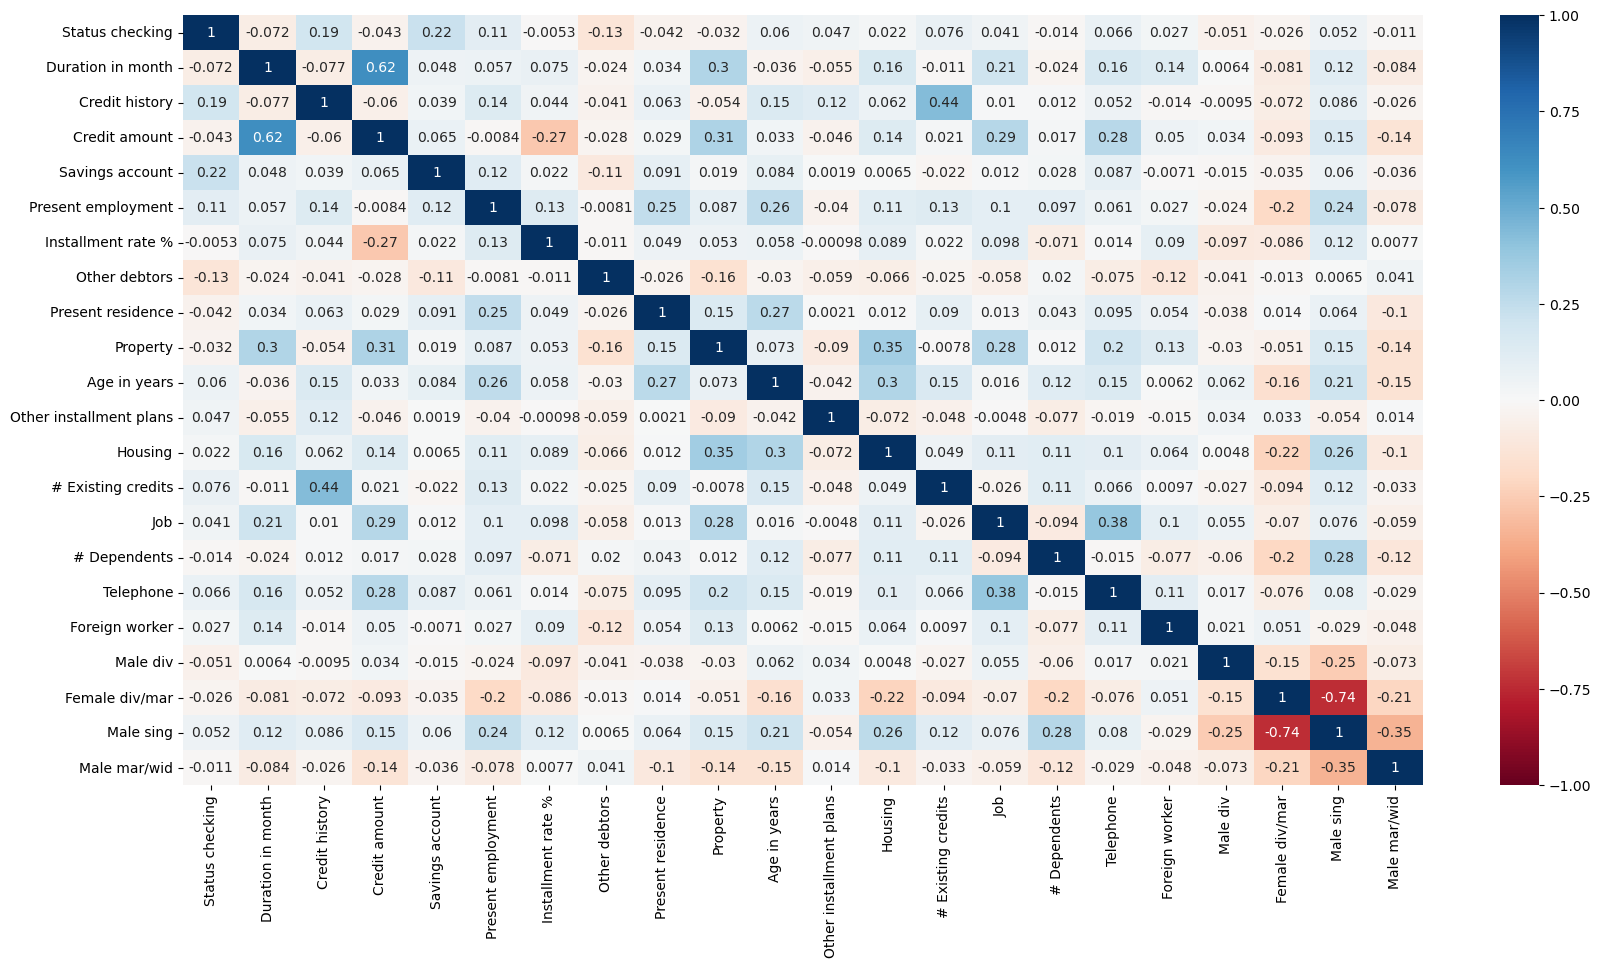

In [4]:
#Heatmap Correlation Matrix
data2 = df.copy().drop(columns=['Class']).corr()
#print(data2)
plt.figure(figsize = (20,10))
pcmp = sns.heatmap(data2, vmin=-1, vmax=1, center=0, annot=True, cmap= 'RdBu')

<Figure size 2000x2000 with 0 Axes>

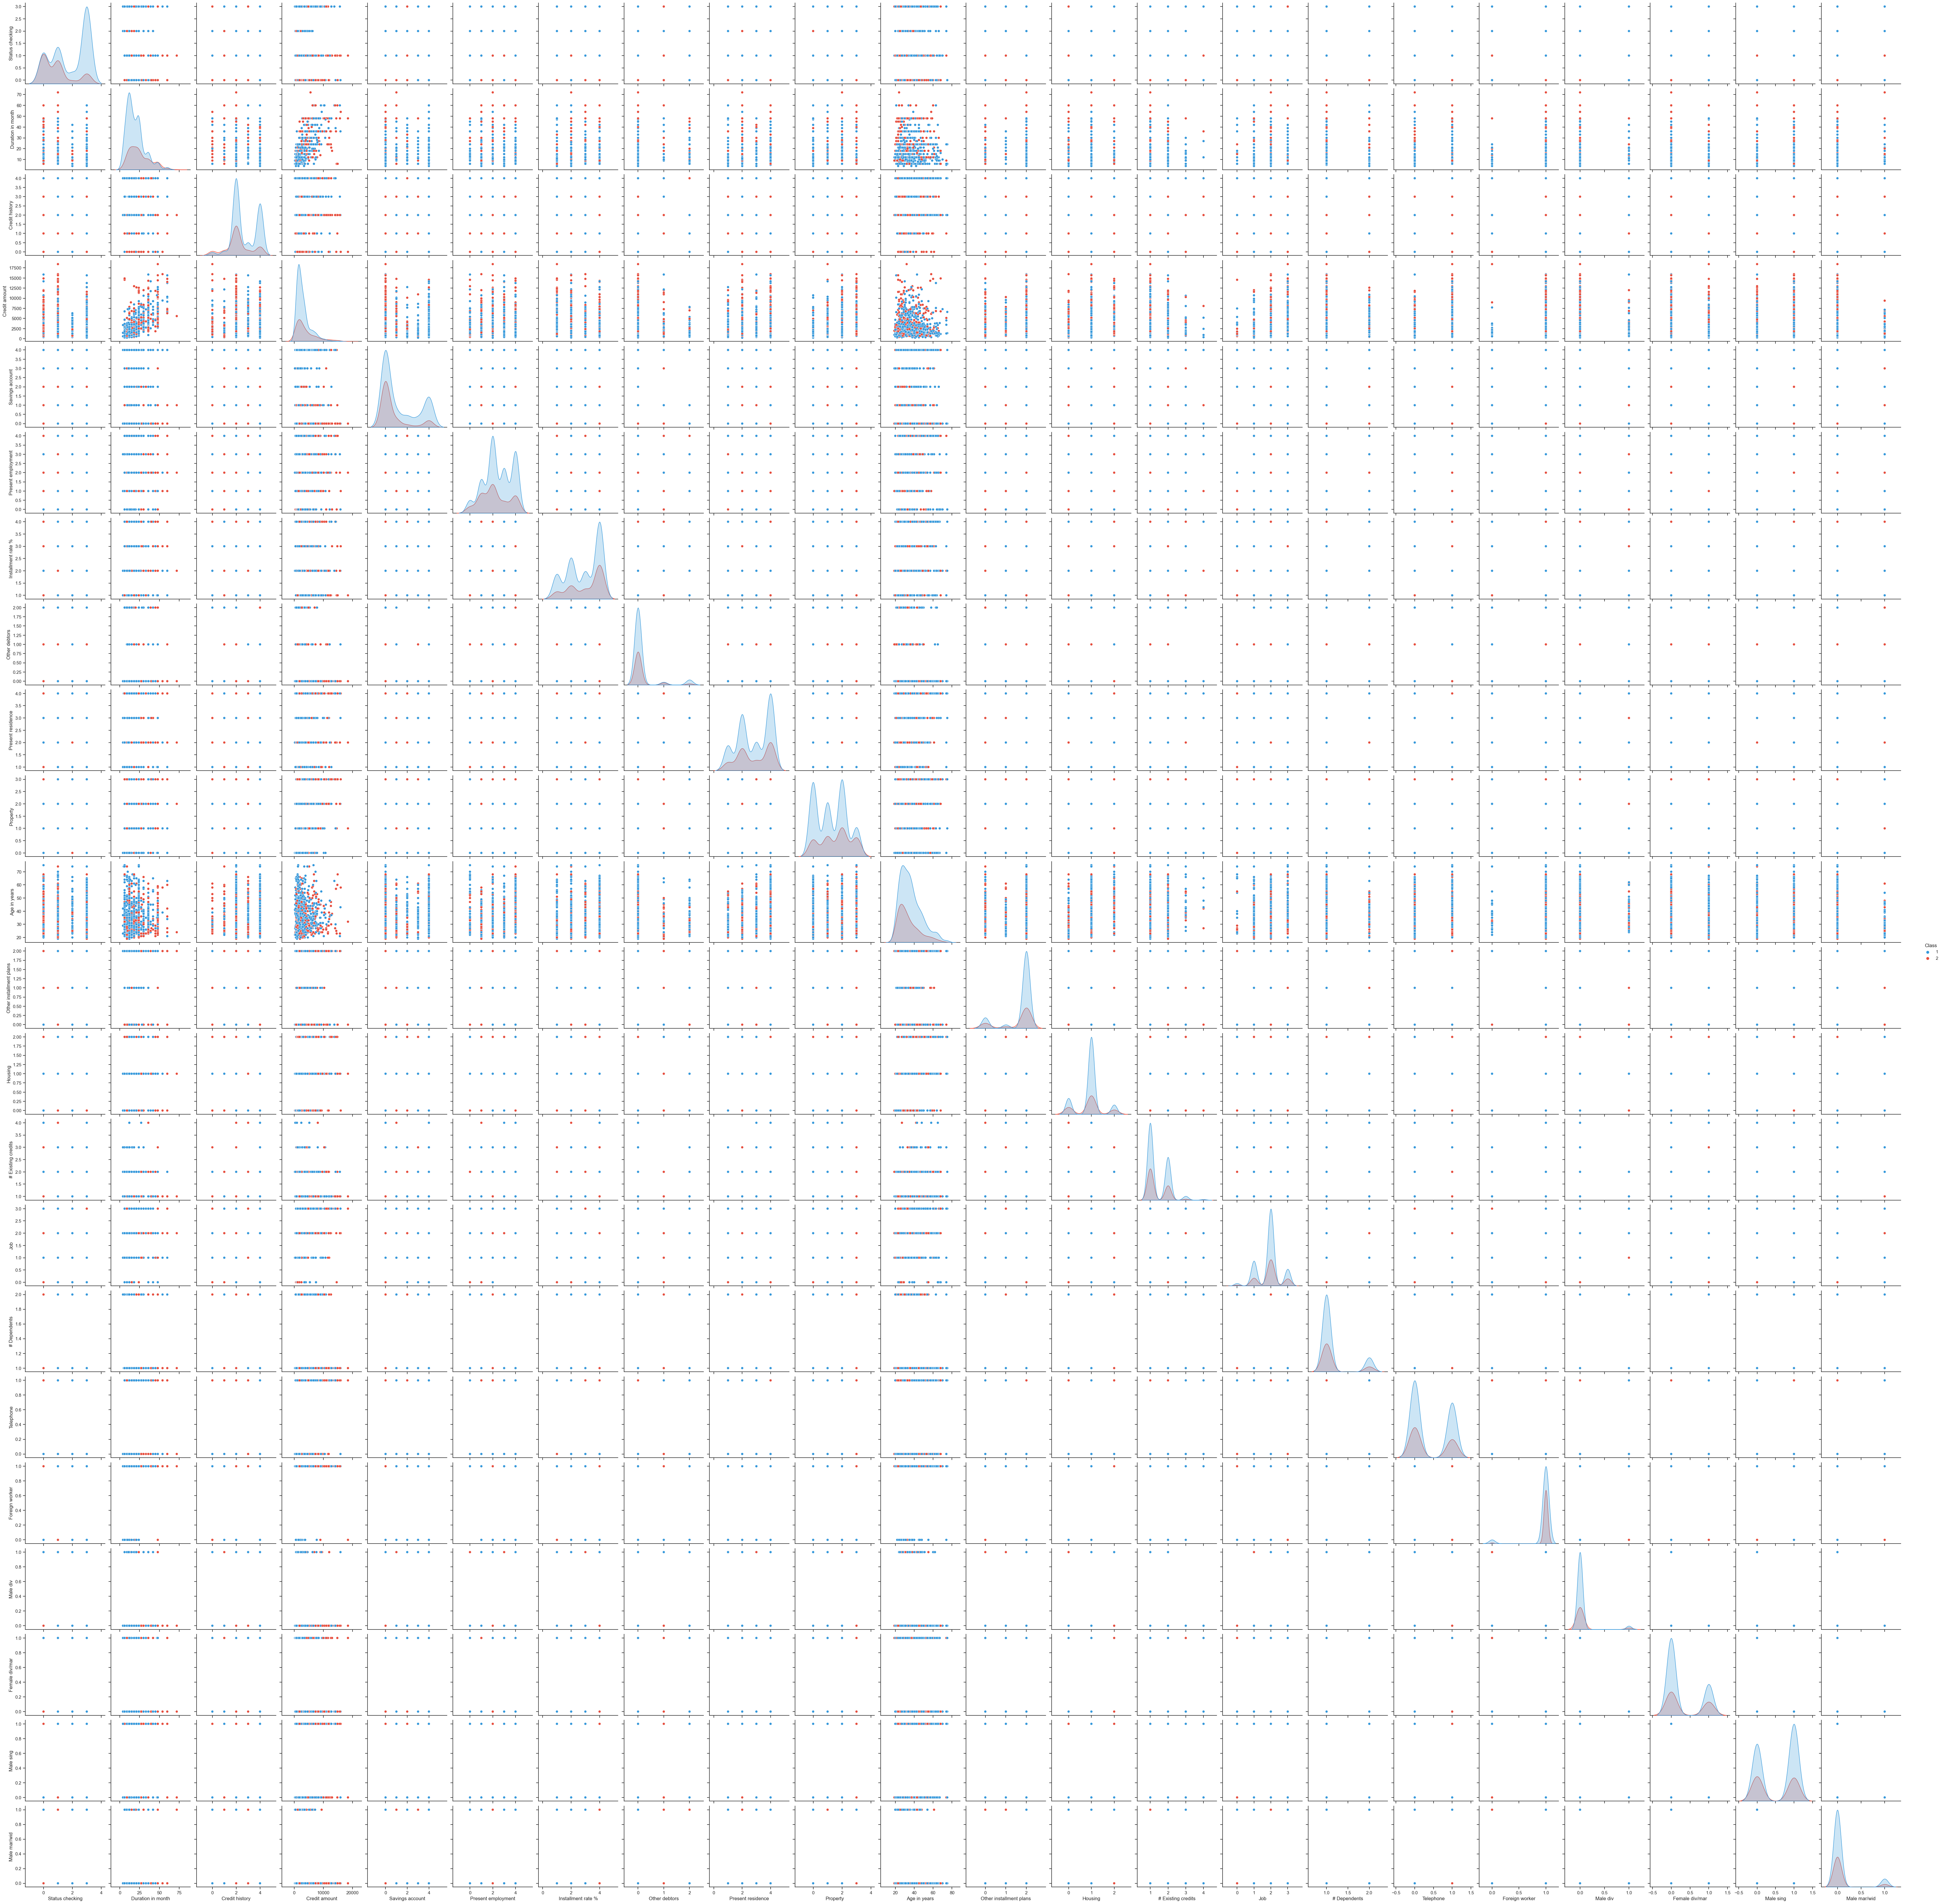

In [8]:
#Pairplot
#Plotting Class Variable

# Set a larger figure size
plt.figure(figsize=(20, 20))
sns.set_theme(style="ticks")

# Create a pairplot with a larger height
# Adjust the height value as needed
#bright_palette = sns.color_palette("tab10")
#sns.pairplot(df, height=2.5, palette=bright_palette, hue="Class")
#sns.pairplot(df, height=2.5, hue="Class")

custom_palette = sns.color_palette(["#3498db", "#e74c3c"])  # Replace with your desired colors
sns.pairplot(df, height=3, hue="Class", palette=custom_palette)